In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as df
import altair as alt



In [2]:
# Load the data
df = pd.read_csv(r"C:/Users/Nguyen/Downloads/Healthcare/healthcare_dataset.csv")

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


| Variable Name                  | Role    | Type         | Description                                                                                   | Missing Values |
|--------------------------------|---------|--------------|-----------------------------------------------------------------------------------------------|----------------|
| Gender                         | Feature | Categorical  | Gender                                                                                        | no             |
| Age                            | Feature | Continuous   | Age                                                                                           | no             |
| Height                         | Feature | Continuous   | Height                                                                                        | no             |
| Weight                         | Feature | Continuous   | Weight                                                                                        | no             |
| family_history_with_overweight | Feature | Binary       | Has a family member suffered or suffers from overweight?                                      | no             |
| FAVC                           | Feature | Binary       | Do you eat high caloric food frequently?                                                      | no             |
| FCVC                           | Feature | Integer      | Do you usually eat vegetables in your meals?                                                  | no             |
| NCP                            | Feature | Continuous   | How many main meals do you have daily?                                                        | no             |
| CAEC                           | Feature | Categorical  | Do you eat any food between meals?                                                            | no             |
| SMOKE                          | Feature | Binary       | Do you smoke?                                                                                 | no             |
| CH2O                           | Feature | Continuous   | How much water do you drink daily?                                                            | no             |
| SCC                            | Feature | Binary       | Do you monitor the calories you eat daily?                                                    | no             |
| FAF                            | Feature | Continuous   | How often do you have physical activity?                                                      | no             |
| TUE                            | Feature | Integer      | How much time do you use technological devices such as cell phone, videogames, television, computer and others? | no             |
| CALC                           | Feature | Categorical  | How often do you drink alcohol?                                                               | no             |
| MTRANS                         | Feature | Categorical  | Which transportation do you usually use?                                                      | no             |
| NObeyesdad                     | Target  | Categorical  | Obesity level                                                                                 | no             |


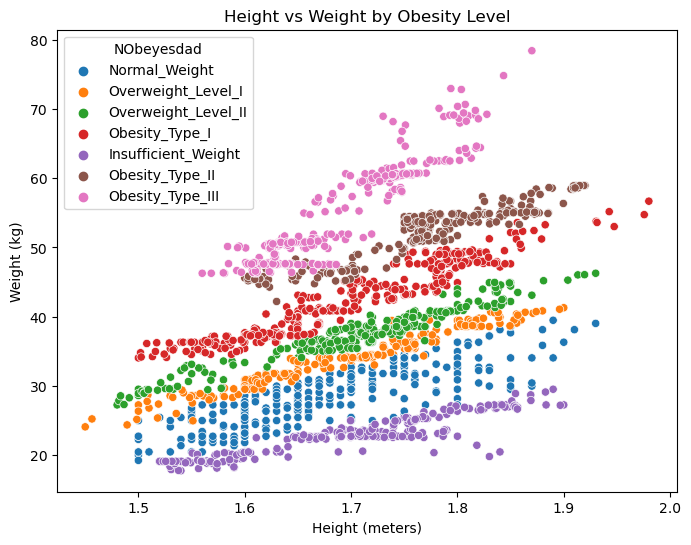

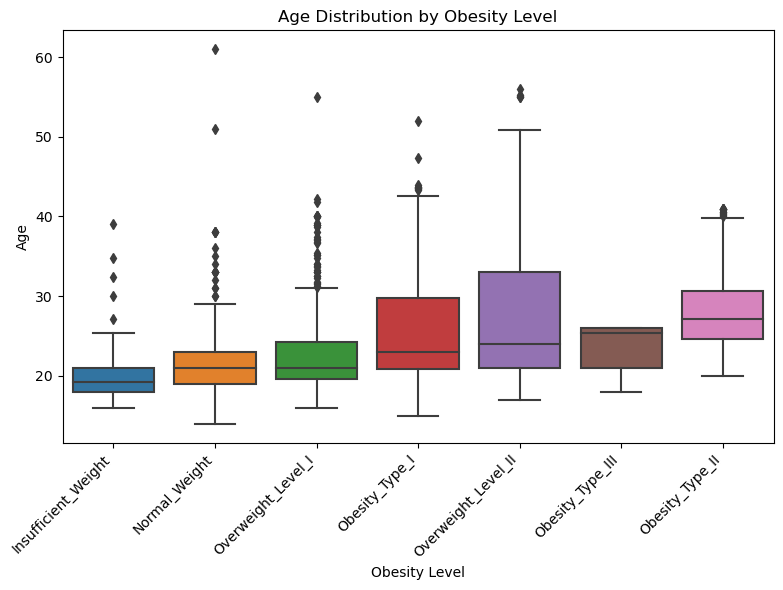

In [3]:
# Data preprocessing (convert height, weight, and age to numeric)
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert height to meters and weight to kg (if they aren't already)
# Check if height is likely in cm and convert if so.  Adjust the threshold if needed.
if df['Height'].mean() > 10:  # Likely in cm
    df['Height'] = df['Height'] / 100

# Check if weight is likely in pounds and convert if so. Adjust the threshold if needed.
if df['Weight'].mean() > 50: # Likely in pounds
    df['Weight'] = df['Weight'] * 0.453592


# Scatter plots of height vs weight, colored by obesity level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df)
plt.title('Height vs Weight by Obesity Level')
plt.xlabel('Height (meters)')  # Explicitly label units
plt.ylabel('Weight (kg)') # Explicitly label units
plt.show()

# Box Plot of average age by obesity level (sorted by median age)
plt.figure(figsize=(8, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=df, order=df.groupby('NObeyesdad')['Age'].median().sort_values().index) # Sort by median for robustness
plt.title('Age Distribution by Obesity Level')
plt.xlabel("Obesity Level") # Add x-axis label
plt.ylabel("Age") # Add y-axis label
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



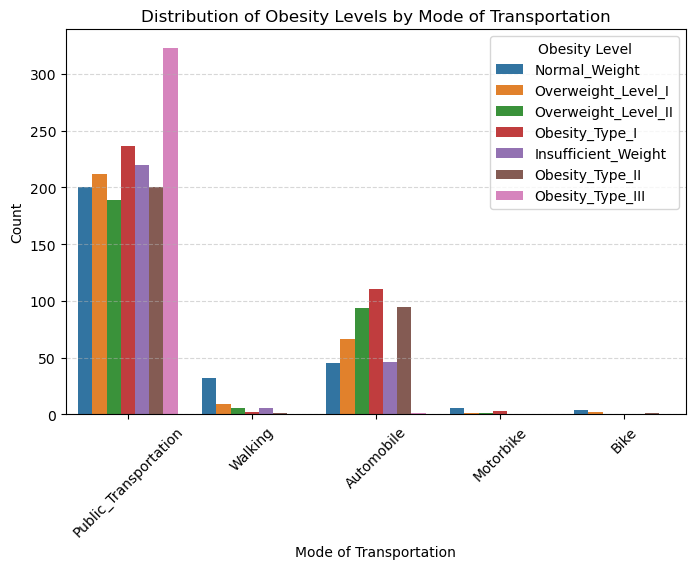

In [4]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="MTRANS", hue="NObeyesdad")

# Customizing the plot
plt.xlabel("Mode of Transportation")
plt.ylabel("Count")
plt.title("Distribution of Obesity Levels by Mode of Transportation")
plt.xticks(rotation=45)
plt.legend(title="Obesity Level")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the plot
plt.show()



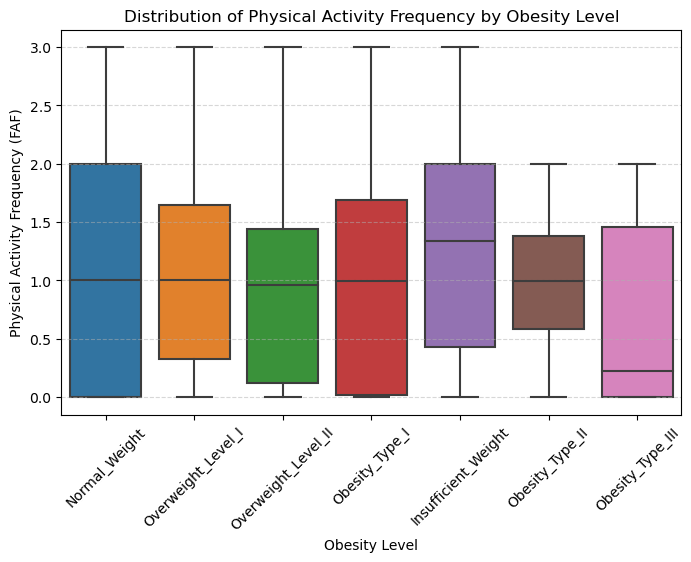

In [5]:
# Creating a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="NObeyesdad", y="FAF")

# Customizing the plot
plt.xlabel("Obesity Level")
plt.ylabel("Physical Activity Frequency (FAF)")
plt.title("Distribution of Physical Activity Frequency by Obesity Level")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the plot
plt.show()


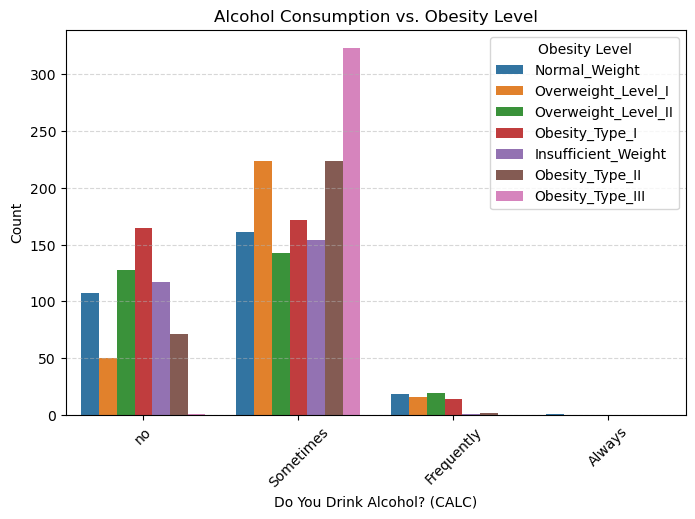

In [6]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="CALC", hue="NObeyesdad")

# Customizing the plot
plt.xlabel("Do You Drink Alcohol? (CALC)")
plt.ylabel("Count")
plt.title("Alcohol Consumption vs. Obesity Level")
plt.xticks(rotation=45)
plt.legend(title="Obesity Level")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the plot
plt.show()


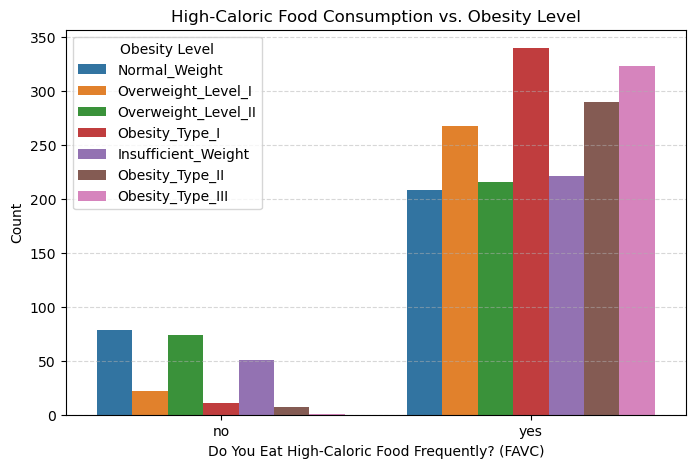

In [7]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="FAVC", hue="NObeyesdad")

# Customizing the plot
plt.xlabel("Do You Eat High-Caloric Food Frequently? (FAVC)")
plt.ylabel("Count")
plt.title("High-Caloric Food Consumption vs. Obesity Level")
plt.legend(title="Obesity Level")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the plot
plt.show()


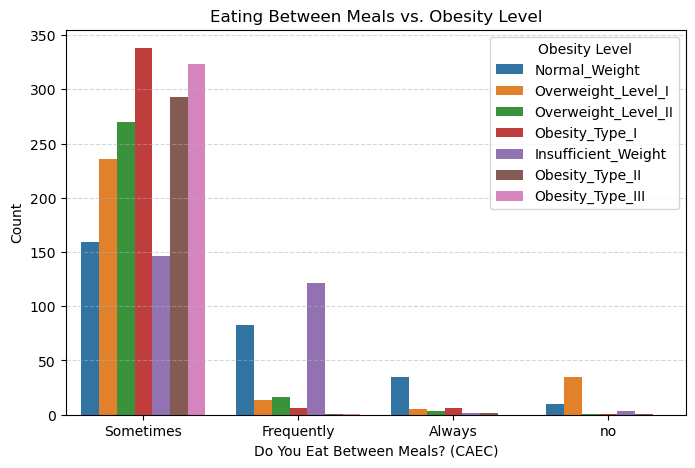

In [8]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="CAEC", hue="NObeyesdad")

# Customizing the plot
plt.xlabel("Do You Eat Between Meals? (CAEC)")
plt.ylabel("Count")
plt.title("Eating Between Meals vs. Obesity Level")
plt.legend(title="Obesity Level")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the plot
plt.show()


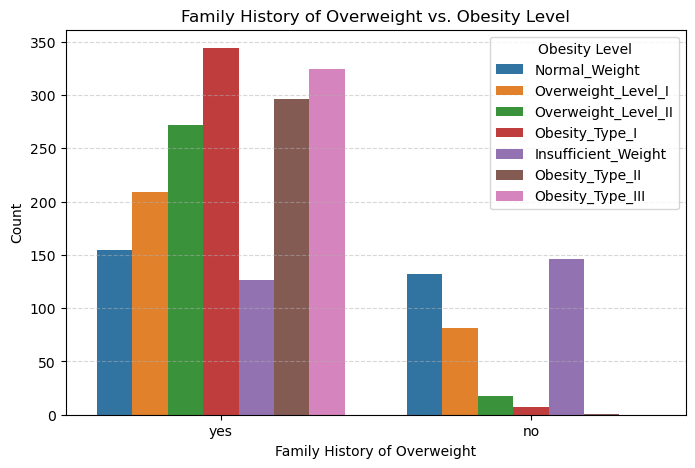

In [9]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="family_history_with_overweight", hue="NObeyesdad")

# Customizing the plot
plt.xlabel("Family History of Overweight")
plt.ylabel("Count")
plt.title("Family History of Overweight vs. Obesity Level")
plt.legend(title="Obesity Level")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the plot
plt.show()
